# Riskfolio-Lib Tutorial: 
<br>__[Financionerioncios](https://financioneroncios.wordpress.com)__
<br>__[Orenji](https://www.orenj-i.net)__
<br>__[Riskfolio-Lib](https://riskfolio-lib.readthedocs.io/en/latest/)__
<br>__[Dany Cajas](https://www.linkedin.com/in/dany-cajas/)__
<a href='https://ko-fi.com/B0B833SXD' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=2' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a> 

## Tutorial 2: Portfolio Optimization with Risk Factors using Stepwise Regression

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")

yf.pdr_override()
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']

assets.sort()

# Tickers of factors

factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers

[*********************100%***********************]  30 of 30 completed


In [2]:
# Calculating returns

X = data[factors].pct_change().dropna()
Y = data[assets].pct_change().dropna()

display(X.head())

,MTUM,QUAL,SIZE,USMV,VLUE
Date,,,,,
2016-01-05,0.4735%,0.2672%,0.0000%,0.6779%,0.1635%
2016-01-06,-0.5267%,-1.1914%,-0.5380%,-0.6253%,-1.8277%
2016-01-07,-2.2293%,-2.3798%,-1.7181%,-1.6215%,-2.1609%
2016-01-08,-0.9548%,-1.1377%,-1.1978%,-1.0086%,-1.0873%
2016-01-11,0.6043%,0.1479%,-0.5898%,0.1491%,-0.6183%


## 2. Estimating Mean Variance Portfolios

### 2.1 Estimating the loadings matrix.

This part is just to visualize how Riskfolio-Lib calculates a loadings matrix.

In [3]:
import riskfolio.ParamsEstimation as pe

step = 'Forward' # Could be Forward or Backward stepwise regression
loadings = pe.loadings_matrix(X=X, Y=Y, stepwise=step)

loadings.style.format("{:.4f}").background_gradient(cmap='RdYlGn')

,const,MTUM,QUAL,SIZE,USMV,VLUE
APA,-0.0006,-0.6551,0.0000,0.9406,-0.7883,1.7237
BA,0.0005,0.0000,1.1744,0.3616,-0.4322,0.0000
BAX,0.0003,0.3146,0.0000,0.0000,0.7717,0.0000
BMY,-0.0003,0.0000,0.8123,0.0000,0.0000,0.0000
CMCSA,0.0001,0.0000,0.4958,0.0000,0.4962,0.0000
CNP,0.0001,-0.5595,-0.2157,0.0000,1.8341,0.0000
CPB,-0.0003,-0.4782,-0.5994,0.0000,2.0793,0.0000
DE,0.0004,0.0000,0.0000,0.3631,0.0000,0.8090
HPQ,0.0002,0.0000,0.0000,0.0000,0.0000,1.2514
JCI,0.0001,0.0000,0.0000,0.3412,0.0000,0.5797


### 2.2 Calculating the portfolio that maximizes Sharpe ratio.

In [4]:
import riskfolio.Portfolio as pf

# Building the portfolio object
port = pf.Portfolio(returns=Y)

# Calculating optimum portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

port.factors = X
port.factors_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

port.alpha = 0.05
model='FM' # Factor Model
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = False # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,5.9509%,11.8691%,0.0000%,0.0000%,9.7091%,0.0000%,4.3628%,0.0000%,0.0000%,...,10.4797%,0.0000%,0.0000%,0.0000%,0.0000%,5.5105%,1.3012%,0.0000%,4.0981%,0.0000%


### 2.3 Plotting portfolio composition

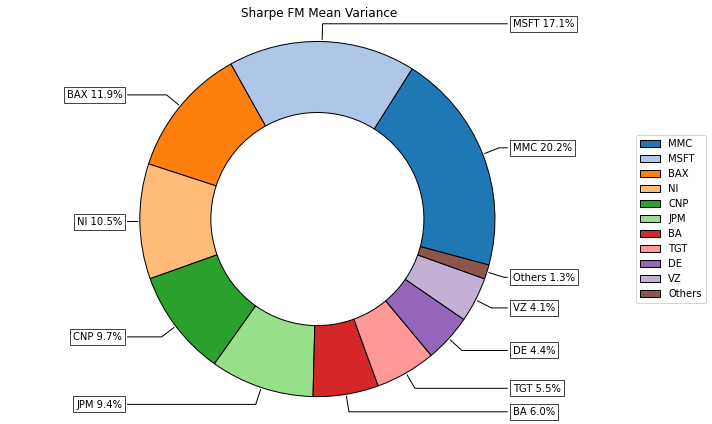

In [5]:
import riskfolio.PlotFunctions as plf

# Plotting the composition of the portfolio

ax = plf.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 2.3 Calculate efficient frontier

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,2.0025%,4.4251%,3.6052%,8.5001%,5.0116%,0.0000%,0.0000%,4.4407%,...,12.0999%,0.0000%,13.3270%,1.0131%,8.1911%,4.0880%,0.0000%,0.0000%,10.3193%,1.6740%
1,0.0000%,1.6551%,6.2745%,1.3152%,3.4741%,10.4973%,3.1812%,0.4168%,0.0000%,2.6580%,...,13.7898%,0.0000%,7.8658%,0.0000%,5.6866%,4.9570%,0.0000%,0.0000%,10.7069%,1.7274%
2,0.0000%,2.2940%,7.3296%,0.0000%,3.1085%,11.2072%,2.5027%,1.0040%,0.0000%,1.7576%,...,14.4136%,0.0000%,5.7433%,0.0000%,4.6756%,5.1835%,0.0000%,0.0000%,10.8397%,1.5227%
3,0.0000%,2.8323%,8.2192%,0.0000%,2.6402%,11.7336%,1.7740%,1.5147%,0.0000%,0.7924%,...,14.8329%,0.0000%,3.5115%,0.0000%,3.5658%,5.3546%,0.0914%,0.0000%,10.8121%,1.2525%
4,0.0000%,3.2845%,8.9511%,0.0000%,2.1579%,12.1063%,1.0660%,1.9452%,0.0000%,0.0000%,...,15.0882%,0.0000%,1.3878%,0.0000%,2.4816%,5.4886%,0.4619%,0.0000%,10.6844%,0.9777%


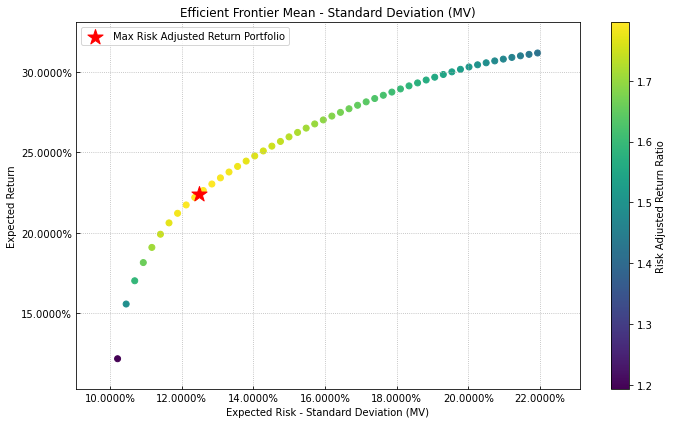

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu_fm # Expected returns
cov = port.cov_fm # Covariance matrix
returns = port.returns_fm # Returns of the assets

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

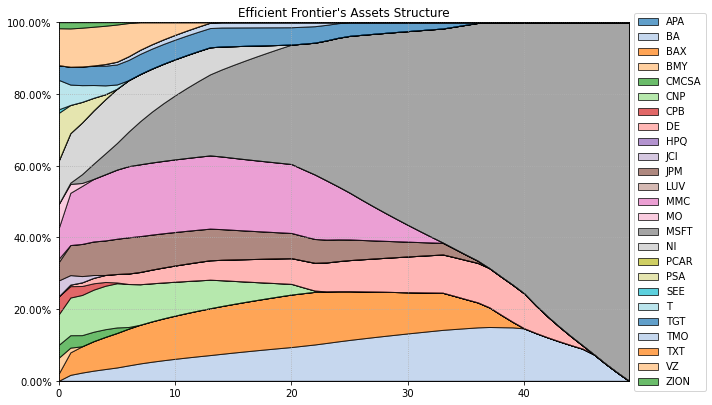

In [8]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

## 3. Optimization with Constraints on Risk Factors

### 3.1 Statistics of Risk Factors

In [9]:
# Displaying factors statistics

display(loadings.min())
display(loadings.max())
display(X.corr())

const    -0.0583%
MTUM    -65.5126%
QUAL    -59.9357%
SIZE    -29.5069%
USMV    -82.0320%
VLUE    -49.1496%
dtype: float64

const     0.0504%
MTUM    103.0208%
QUAL    117.4359%
SIZE     94.0623%
USMV    232.5683%
VLUE    172.3685%
dtype: float64

,MTUM,QUAL,SIZE,USMV,VLUE
MTUM,100.0000%,90.4265%,79.1172%,87.2321%,78.5395%
QUAL,90.4265%,100.0000%,89.8168%,89.9554%,91.6580%
SIZE,79.1172%,89.8168%,100.0000%,82.5080%,87.9111%
USMV,87.2321%,89.9554%,82.5080%,100.0000%,76.9678%
VLUE,78.5395%,91.6580%,87.9111%,76.9678%,100.0000%


### 3.2 Creating Constraints on Risk Factors

In [10]:
# Creating risk factors constraints

import riskfolio.ConstraintsFunctions as cf

constraints = {'Disabled': [False, False, False, False, False],
               'Factor': ['MTUM', 'QUAL', 'SIZE', 'USMV', 'VLUE'],
               'Sign': ['<=', '<=', '<=', '>=', '<='],
               'Value': [-0.3, 0.8, 0.4, 0.8 , 0.9],}

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Factor,Sign,Value
0,False,MTUM,<=,-30.0000%
1,False,QUAL,<=,80.0000%
2,False,SIZE,<=,40.0000%
3,False,USMV,>=,80.0000%
4,False,VLUE,<=,90.0000%


In [11]:
C, D = cf.factors_constraints(constraints, loadings)

In [12]:
port.ainequality = C
port.binequality = D

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.0000%,6.5883%,1.4644%,0.0000%,0.0000%,17.5476%,0.0000%,4.0956%,0.0000%,0.0000%,...,14.0140%,1.4169%,0.0000%,0.0000%,0.0000%,4.4188%,0.0000%,0.0000%,10.6393%,2.1181%


To check if the constraints are verified, I will make a regression among the portfolio returns and risk factors:

In [13]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
y = np.matrix(returns) * np.matrix(w)
results = sm.OLS(y, X1).fit()
coefs = results.params

print(coefs)

const     0.0229%
MTUM    -30.0000%
QUAL     15.4395%
SIZE      1.8657%
USMV     92.6045%
VLUE     21.8622%
dtype: float64


### 3.3 Plotting portfolio composition

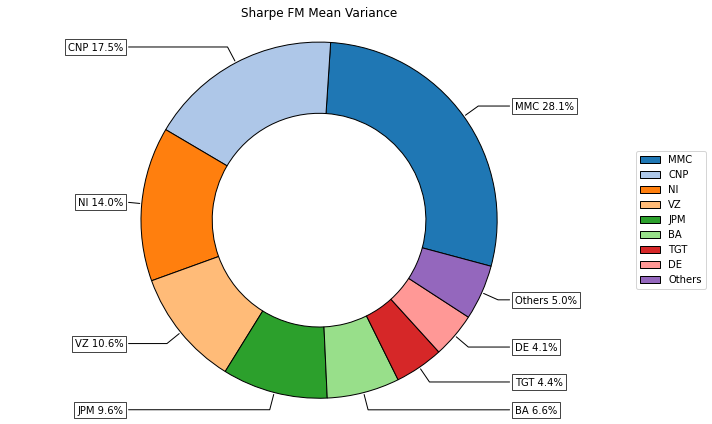

In [14]:
ax = plf.plot_pie(w=w, title='Sharpe FM Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

### 3.4 Calculate efficient frontier

In [15]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
0,0.0000%,0.0000%,2.0033%,4.4251%,3.6050%,8.4993%,5.0116%,0.0000%,0.0000%,4.4407%,...,12.0995%,0.0000%,13.3267%,1.0159%,8.1901%,4.0879%,0.0000%,0.0000%,10.3183%,1.6737%
1,0.0000%,1.0467%,4.4741%,2.0057%,3.3537%,10.4704%,3.7214%,0.0000%,0.0000%,3.0027%,...,13.5251%,0.0000%,9.1906%,0.0000%,6.6453%,4.6732%,0.0000%,0.0000%,10.9803%,2.0507%
2,0.0000%,1.7410%,4.7954%,0.7903%,2.9694%,11.5752%,3.1987%,0.3923%,0.0000%,2.1218%,...,14.2351%,0.0000%,7.3206%,0.0000%,6.0850%,4.8025%,0.0000%,0.0000%,11.4548%,2.1781%
3,0.0000%,2.2663%,4.9910%,0.0000%,2.6373%,12.4530%,2.7844%,0.8029%,0.0000%,1.4005%,...,14.7948%,0.0000%,5.8320%,0.0000%,5.6384%,4.8920%,0.0000%,0.0000%,11.8321%,2.2620%
4,0.0000%,2.7309%,5.0078%,0.0000%,2.2236%,13.3382%,2.3698%,1.1680%,0.0000%,0.6178%,...,15.3286%,0.0003%,4.2963%,0.0000%,5.1940%,4.9446%,0.0000%,0.0000%,12.2137%,2.3335%


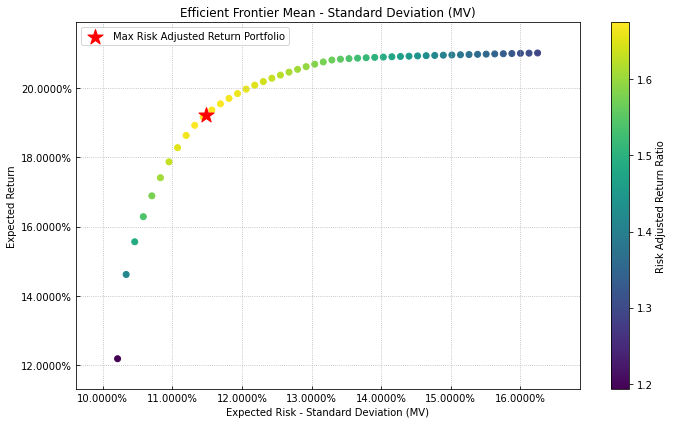

In [16]:
# Plotting efficient frontier composition

ax = plf.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                       rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                       marker='*', s=16, c='r', height=6, width=10, ax=None)

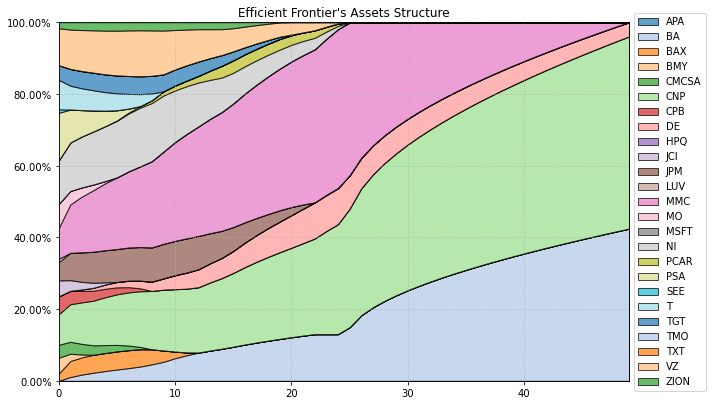

In [17]:
# Plotting efficient frontier composition

ax = plf.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [18]:
display(returns)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
2016-01-05,-0.6212%,0.0684%,0.7015%,0.1909%,0.4771%,0.9282%,0.9912%,0.1761%,0.2253%,0.1002%,...,1.1711%,-0.1121%,0.8782%,0.3502%,0.6936%,0.1709%,0.5662%,-0.2137%,0.9752%,-0.3551%
2016-01-06,-2.8766%,-1.2757%,-0.6189%,-0.9938%,-0.8928%,-0.5878%,-0.3663%,-1.6301%,-2.2665%,-1.2376%,...,-0.0189%,-2.1654%,-0.0371%,-1.3275%,-1.3762%,-1.3348%,-1.0117%,-1.8914%,-0.9195%,-2.5118%
2016-01-07,-2.6603%,-2.6676%,-1.9233%,-1.9592%,-1.9764%,-1.2059%,-0.9113%,-2.3282%,-2.6834%,-1.8334%,...,-0.8785%,-2.6708%,-1.0103%,-1.9321%,-1.3740%,-1.5868%,-2.5264%,-2.5834%,-1.1151%,-2.2578%
2016-01-08,-1.6385%,-1.2856%,-1.0494%,-0.9502%,-1.0563%,-1.0629%,-0.9909%,-1.2707%,-1.3400%,-1.0335%,...,-0.9977%,-1.3239%,-0.9137%,-1.2706%,-0.9455%,-0.7750%,-1.2535%,-1.3153%,-0.9453%,-1.1138%
2016-01-11,-2.1923%,-0.0564%,0.3346%,0.0940%,0.1556%,-0.0891%,-0.0995%,-0.6705%,-0.7531%,-0.5542%,...,0.2116%,-0.7575%,0.3163%,-0.5897%,-0.4351%,-0.4203%,0.3350%,-0.8259%,-0.1978%,-1.4465%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,0.6973%,0.2477%,-0.4231%,-0.0181%,-0.1988%,-0.5601%,-0.7398%,0.1196%,0.1322%,0.0606%,...,-0.8528%,0.4842%,-0.6862%,-0.1714%,-0.3265%,0.1146%,-0.2473%,0.3183%,-0.5772%,0.6377%
2019-12-24,-0.1965%,0.0027%,0.1506%,-0.0503%,0.0391%,0.0930%,0.1006%,0.0557%,-0.0071%,0.0206%,...,0.1566%,-0.1185%,0.0728%,-0.0238%,0.0130%,0.0305%,0.0896%,-0.0882%,0.0777%,-0.0760%
2019-12-26,0.0838%,0.3934%,0.3568%,0.2717%,0.3344%,0.2787%,0.1966%,0.3099%,0.3688%,0.2053%,...,0.2526%,0.3537%,0.2094%,0.2125%,0.2702%,0.2577%,0.4285%,0.2202%,0.2812%,0.2258%
2019-12-27,-0.7229%,-0.0384%,0.2654%,-0.0101%,0.1392%,0.3665%,0.3917%,-0.1304%,-0.2432%,-0.1203%,...,0.5586%,-0.2998%,0.4284%,-0.0293%,0.0814%,-0.1122%,0.1726%,-0.3568%,0.2897%,-0.5416%


## 4. Estimating Portfolios Using Risk Factors with Other Risk Measures

In this part I will calculate optimal portfolios for several risk measures. I will find the portfolios that maximize the risk adjusted return for all available risk measures.

### 4.1 Calculate Optimal Portfolios for Several Risk Measures.

I will mantain the constraints on risk factors.

In [19]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

# port.reset_linear_constraints() # To reset linear constraints (factor constraints)

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = False
for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [20]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,6.59%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BAX,1.46%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,17.55%,42.32%,53.62%,41.97%,53.62%,41.33%,53.62%,48.75%,0.00%,46.96%,23.97%,46.45%,43.15%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,4.10%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

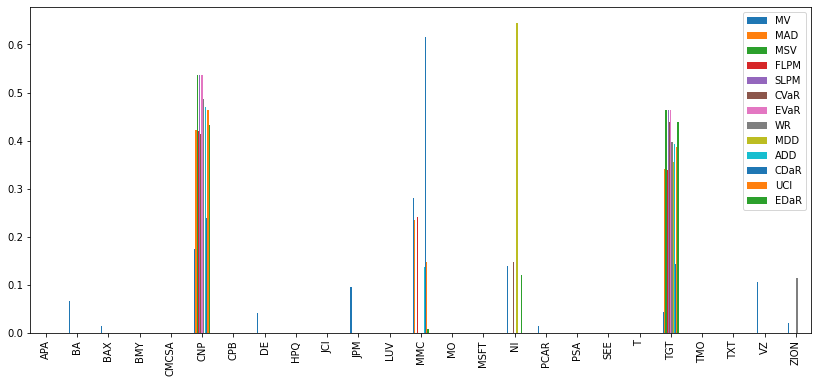

In [21]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)

In [22]:
w_s = pd.DataFrame([])

# When we use hist = True the risk measures all calculated
# using historical returns, while when hist = False the
# risk measures are calculated using the expected returns 
#  based on risk factor model: R = a + B * F

hist = True
for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [23]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
APA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BA,7.46%,6.61%,8.25%,6.36%,8.43%,8.52%,8.43%,0.00%,7.16%,13.63%,16.38%,14.84%,6.78%
BAX,1.03%,0.98%,0.36%,0.96%,0.22%,3.48%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BMY,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CMCSA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CNP,17.82%,13.21%,17.50%,12.81%,17.99%,21.30%,31.74%,29.80%,55.32%,12.02%,27.50%,16.88%,45.28%
CPB,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.41%,7.20%,0.00%,0.00%,0.00%,0.00%,0.00%
DE,3.77%,2.12%,2.68%,2.91%,2.82%,3.09%,1.63%,0.00%,5.45%,0.38%,0.00%,1.24%,0.00%
HPQ,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
JCI,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<AxesSubplot:>

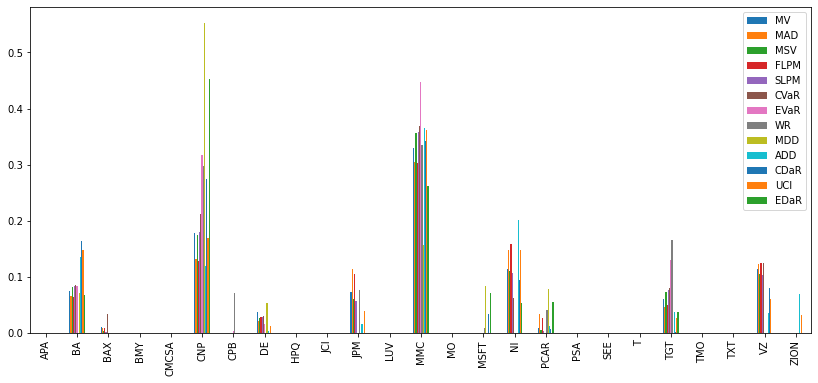

In [24]:
import matplotlib.pyplot as plt

# Plotting a comparison of assets weights for each portfolio

fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)